In [1]:
import pandas as pd
import numpy as np

 データの読み込み

In [2]:
df = pd.read_csv('./cbb19.csv')

In [3]:
pd.set_option('display.max_columns', 100)
df.head()

,TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED
0,Gonzaga,WCC,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,26.8,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,E8,1.0
1,Virginia,ACC,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,Champions,1.0
2,Duke,ACC,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,E8,1.0
3,North Carolina,ACC,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,22.8,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,S16,1.0
4,Michigan,B10,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,S16,2.0


 勝率データ（ser_ratio）の作成

In [4]:
# 試合数
ser_game = df['G']

In [5]:
# 勝利数
ser_win = df['W']

In [6]:
# 勝率 = 勝利数 / 試合数
ser_ratio = ser_win / ser_game
df['ratio'] = ser_ratio

データクレンジング

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 24 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    68 non-null object
SEED          68 non-null float64
ratio         353 non-null float64
dtypes: float64(19), int64(2), object(3)
memory usage: 66.3+ KB


欠損値のある列("POSTSEASON"、"SEED")の欠損値を０に置き換え、値が入っている所は１として置き換える。

In [8]:
df = df.fillna(0)

In [9]:
df = df.replace(df.loc[0:67, ['POSTSEASON', 'SEED']], 1)

In [10]:
df.describe()

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,ratio
count,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000,353.000000
mean,31.745042,17.113314,103.335977,103.336261,0.493214,50.600850,50.774504,18.606516,18.523513,28.245892,28.420397,32.954391,33.202550,50.060057,50.233994,34.287819,34.415864,69.168555,-7.783569,0.192635,0.192635,0.532116
std,2.514195,6.374993,7.020019,6.452597,0.253006,2.938629,2.752896,2.066711,2.092719,3.938373,2.923335,4.708719,5.080133,3.362801,3.122286,2.537098,2.336075,2.694397,7.120550,0.394928,0.394928,0.173926
min,26.000000,3.000000,83.700000,85.200000,0.034600,40.000000,42.500000,13.500000,13.300000,15.900000,21.700000,21.900000,21.800000,37.700000,40.700000,27.900000,27.900000,60.700000,-23.400000,0.000000,0.000000,0.100000
25%,30.000000,12.000000,98.600000,98.700000,0.281400,48.800000,48.900000,17.200000,17.100000,25.400000,26.300000,29.900000,29.700000,47.700000,48.300000,32.400000,32.900000,67.300000,-13.100000,0.000000,0.000000,0.406250
50%,31.000000,17.000000,103.100000,104.000000,0.476200,50.500000,50.900000,18.500000,18.300000,28.300000,28.300000,33.300000,32.700000,50.300000,50.200000,34.200000,34.400000,69.000000,-8.600000,0.000000,0.000000,0.531250
75%,33.000000,21.000000,107.700000,107.800000,0.689300,52.800000,52.600000,19.800000,19.800000,31.000000,30.400000,35.900000,36.400000,52.200000,52.200000,36.000000,35.900000,70.800000,-3.100000,0.000000,0.000000,0.655172
max,39.000000,35.000000,123.400000,119.200000,0.974400,59.000000,59.300000,25.100000,24.700000,38.700000,37.100000,48.100000,54.000000,61.400000,61.200000,42.400000,41.800000,79.100000,11.200000,1.000000,1.000000,0.937500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 24 columns):
TEAM          353 non-null object
CONF          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    353 non-null int64
SEED          353 non-null float64
ratio         353 non-null float64
dtypes: float64(19), int64(3), object(2)
memory usage: 66.3+ KB

'CONF'列の二値化

In [12]:
df = pd.get_dummies(df, columns=['CONF'])

In [13]:
df.head()

,TEAM,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,ratio,CONF_A10,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,CONF_B12,CONF_BE,CONF_BSky,CONF_BSth,CONF_BW,CONF_CAA,CONF_CUSA,CONF_Horz,CONF_Ivy,CONF_MAAC,CONF_MAC,CONF_MEAC,CONF_MVC,CONF_MWC,CONF_NEC,CONF_OVC,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,Gonzaga,37,33,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,26.8,35.3,25.9,61.4,43.4,36.3,30.4,72.0,7.0,1,1.0,0.891892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Virginia,38,35,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,11.1,1,1.0,0.921053,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Duke,38,32,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,11.2,1,1.0,0.842105,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Carolina,36,29,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,22.8,30.2,28.4,52.1,47.9,36.2,33.5,76.0,10.0,1,1.0,0.805556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Michigan,37,30,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,9.2,1,1.0,0.810811,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353 entries, 0 to 352
Data columns (total 55 columns):
TEAM          353 non-null object
G             353 non-null int64
W             353 non-null int64
ADJOE         353 non-null float64
ADJDE         353 non-null float64
BARTHAG       353 non-null float64
EFG_O         353 non-null float64
EFG_D         353 non-null float64
TOR           353 non-null float64
TORD          353 non-null float64
ORB           353 non-null float64
DRB           353 non-null float64
FTR           353 non-null float64
FTRD          353 non-null float64
2P_O          353 non-null float64
2P_D          353 non-null float64
3P_O          353 non-null float64
3P_D          353 non-null float64
ADJ_T         353 non-null float64
WAB           353 non-null float64
POSTSEASON    353 non-null int64
SEED          353 non-null float64
ratio         353 non-null float64
CONF_A10      353 non-null uint8
CONF_ACC      353 non-null uint8
CONF_AE       353 non-null uint

ratioと相関関係が大きすぎるものは除外すべき

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

df_corr = df.corr()

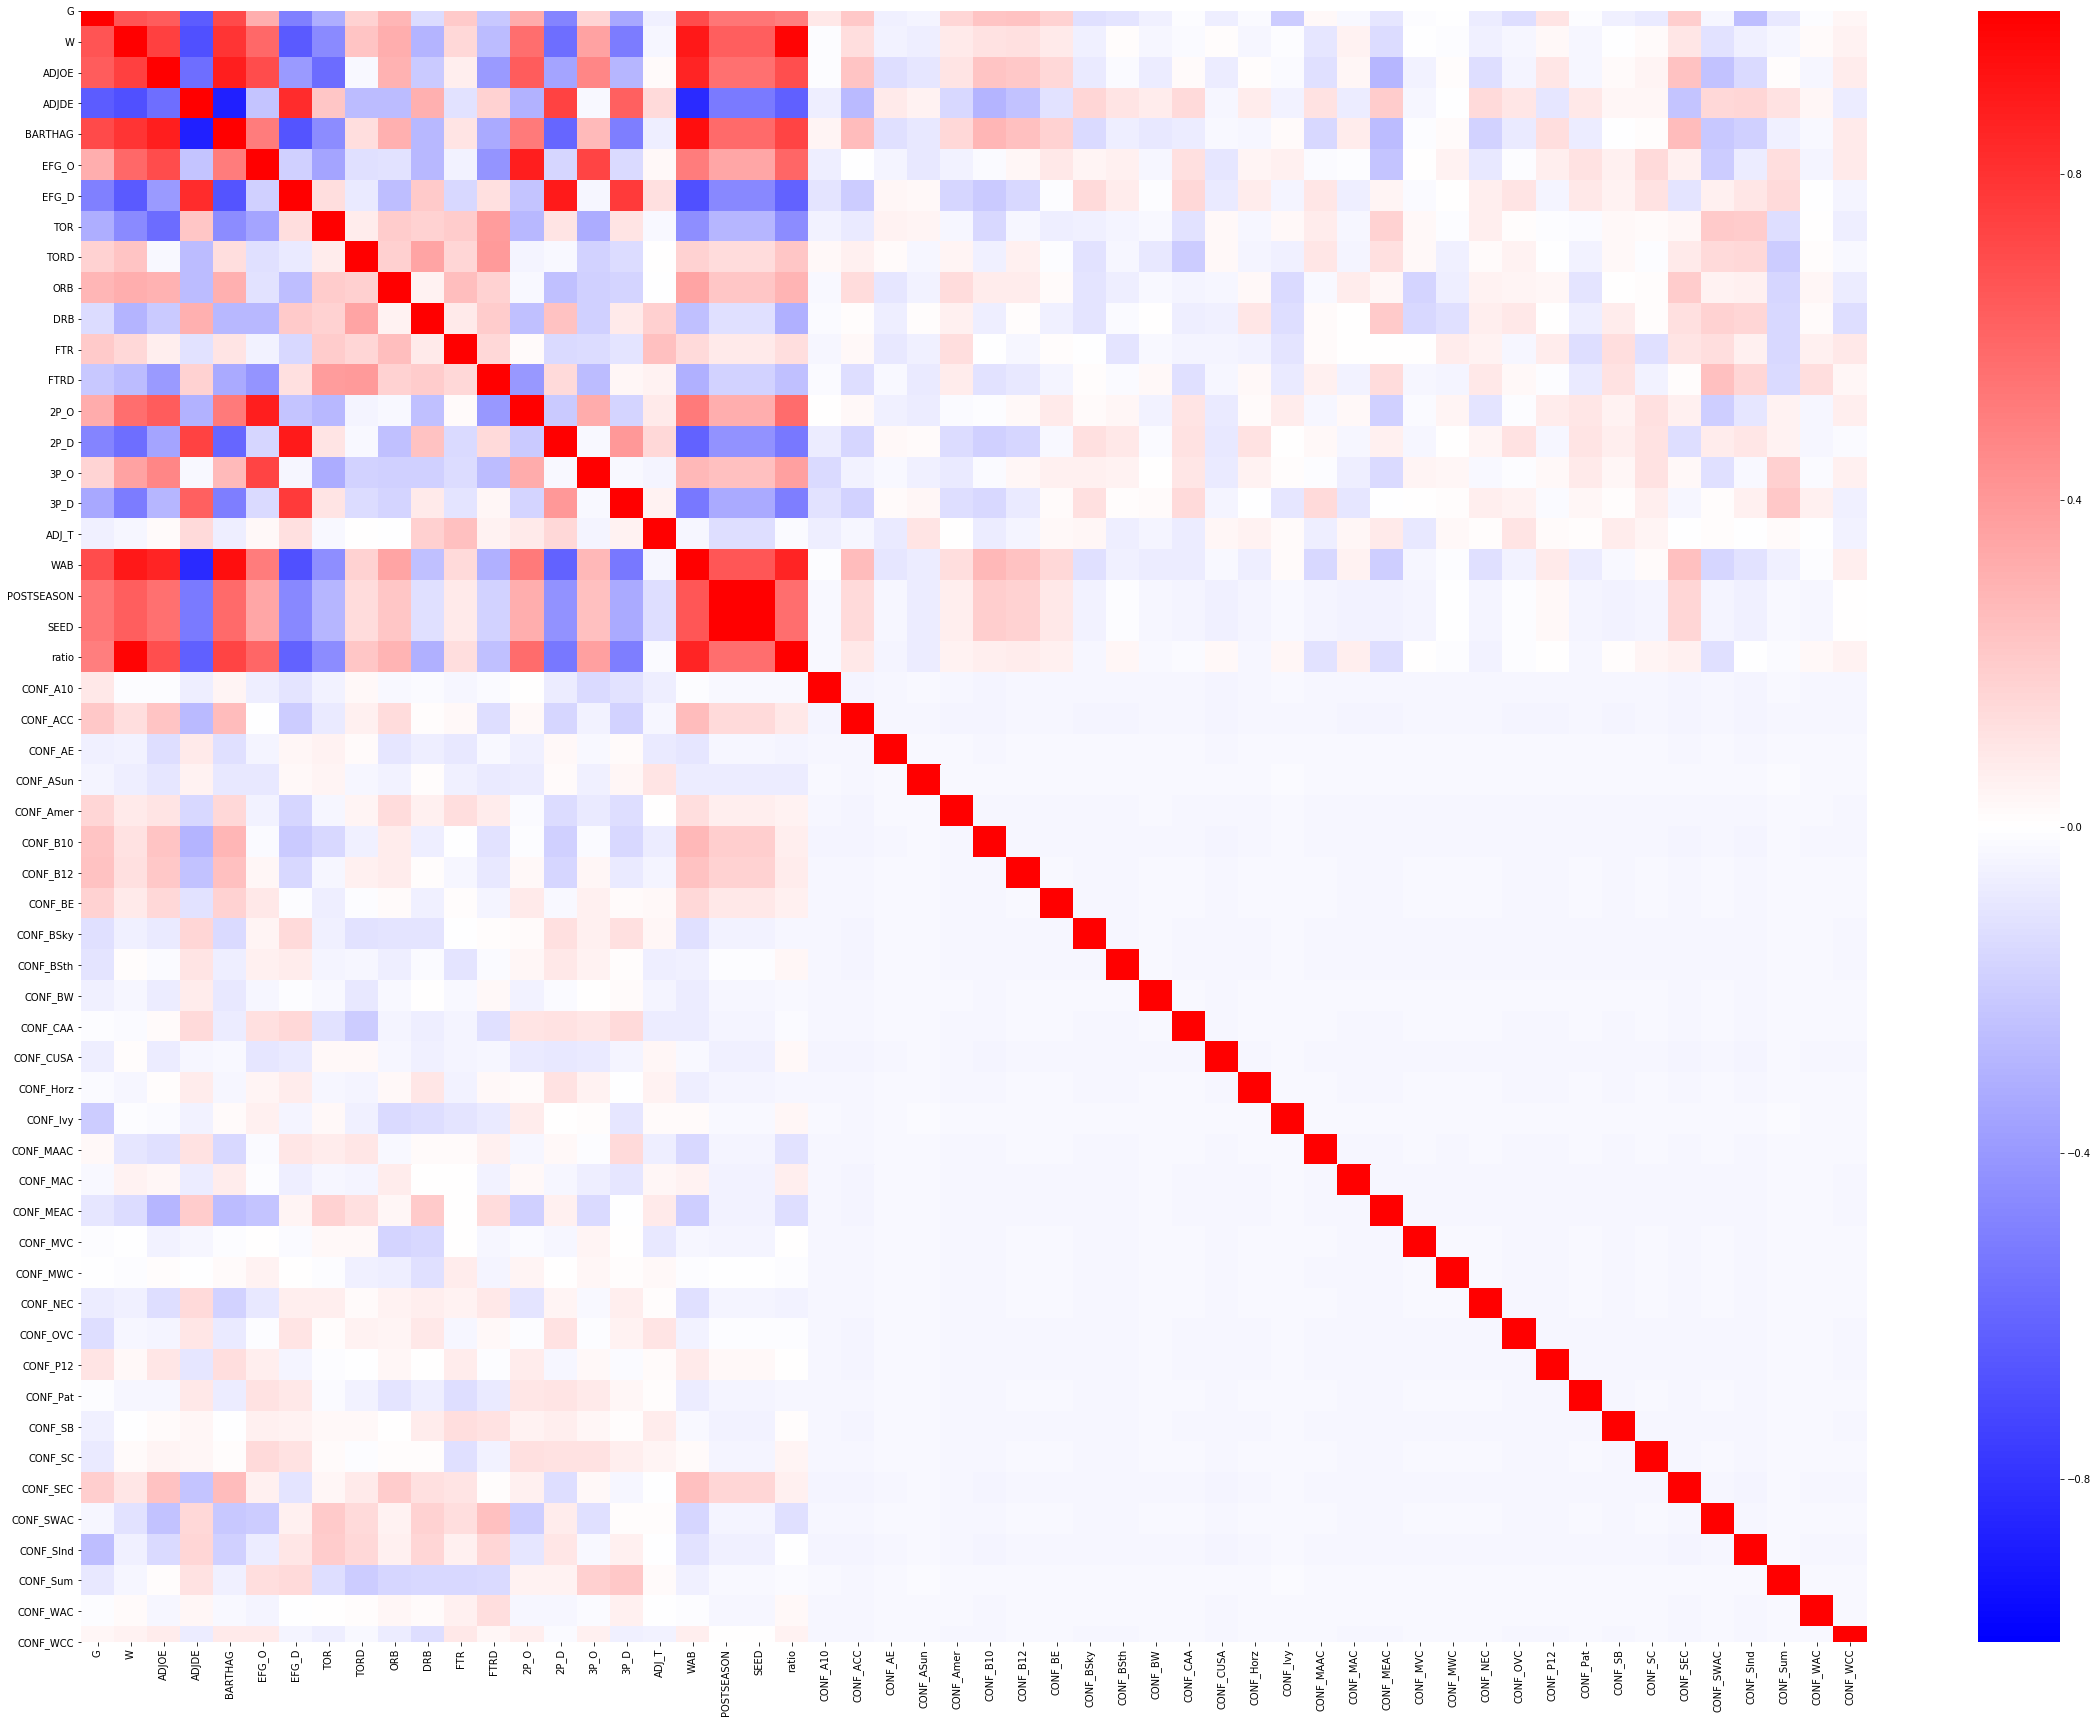

In [16]:
plt.figure(figsize=(40, 30))
sns.heatmap(df_corr, vmax=1, vmin=-1, center=0, cmap='bwr')

In [17]:
df_corr

,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,ratio,CONF_A10,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,CONF_B12,CONF_BE,CONF_BSky,CONF_BSth,CONF_BW,CONF_CAA,CONF_CUSA,CONF_Horz,CONF_Ivy,CONF_MAAC,CONF_MAC,CONF_MEAC,CONF_MVC,CONF_MWC,CONF_NEC,CONF_OVC,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
G,1.000000,0.668788,0.640437,-0.634291,0.707243,0.317408,-0.498786,-0.316186,0.178514,0.285768,-0.135271,0.204885,-0.213699,0.324457,-0.480759,0.164477,-0.337074,-0.054908,0.695400,0.538860,0.538860,0.507412,0.090017,0.211585,-0.055158,-0.045189,0.162261,0.228777,0.241771,0.173762,-0.124161,-0.105481,-0.055158,-0.009864,-0.066088,-0.016665,-0.196822,0.024706,-0.030762,-0.099255,-0.009864,-0.001269,-0.077874,-0.130388,0.106222,-0.009864,-0.055669,-0.084675,0.188306,-0.037068,-0.255733,-0.090679,-0.012208,0.037742
W,0.668788,1.000000,0.747631,-0.684400,0.791463,0.587550,-0.647509,-0.457309,0.233868,0.319706,-0.291895,0.150735,-0.260970,0.569114,-0.567875,0.360899,-0.511362,-0.032242,0.901533,0.631103,0.631103,0.977414,-0.010458,0.130825,-0.048050,-0.065502,0.082609,0.114953,0.120341,0.082791,-0.057364,0.008939,-0.033934,-0.021815,0.010064,-0.035226,-0.014671,-0.097953,0.050685,-0.133489,-0.000357,-0.013437,-0.062047,-0.037718,0.028584,-0.037908,-0.003339,0.018418,0.098992,-0.113009,-0.057825,-0.038591,0.019706,0.053287
ADJOE,0.640437,0.747631,1.000000,-0.568744,0.875756,0.698596,-0.391780,-0.575551,-0.029380,0.297432,-0.206887,0.065536,-0.395675,0.637682,-0.357586,0.471384,-0.285562,0.020840,0.852475,0.555652,0.555652,0.693909,-0.008704,0.228311,-0.132607,-0.097990,0.104963,0.228596,0.212494,0.155255,-0.085704,-0.019249,-0.071077,0.021045,-0.078072,0.008623,-0.020332,-0.120465,0.032265,-0.281500,-0.053001,0.009778,-0.128265,-0.042441,0.096043,-0.034977,0.019776,0.045159,0.241848,-0.237387,-0.147554,0.013881,-0.032364,0.075606
ADJDE,-0.634291,-0.684400,-0.568744,1.000000,-0.868742,-0.231538,0.822663,0.224042,-0.263413,-0.263516,0.307995,-0.114718,0.176524,-0.297216,0.741785,-0.031037,0.622482,0.147413,-0.832084,-0.520360,-0.520360,-0.622331,-0.068276,-0.267969,0.079419,0.047886,-0.155600,-0.290850,-0.237335,-0.112523,0.161737,0.103510,0.076630,0.147170,-0.033584,0.072972,-0.046941,0.117156,-0.072384,0.199342,-0.033290,-0.006323,0.146110,0.095504,-0.095432,0.087812,0.033395,0.031633,-0.228899,0.150880,0.162306,0.114944,0.032839,-0.075159
BARTHAG,0.707243,0.791463,0.875756,-0.868742,1.000000,0.513541,-0.664659,-0.451669,0.125869,0.309525,-0.278033,0.102950,-0.330788,0.521902,-0.595919,0.270415,-0.504589,-0.067080,0.942022,0.580775,0.580775,0.731502,0.040258,0.260580,-0.122909,-0.090094,0.155439,0.287622,0.247744,0.178011,-0.146970,-0.062579,-0.090329,-0.073351,-0.026618,-0.036619,0.020206,-0.154764,0.071412,-0.258922,-0.012560,0.017504,-0.171880,-0.080844,0.132056,-0.077872,-0.003042,0.010621,0.259986,-0.217080,-0.182629,-0.059113,-0.023889,0.079347
EFG_O,0.317408,0.587550,0.698596,-0.231538,0.513541,1.000000,-0.181070,-0.359249,-0.123660,-0.112229,-0.277558,-0.054427,-0.421188,0.875997,-0.158161,0.731298,-0.141289,0.023519,0.514331,0.347216,0.347216,0.599316,-0.067827,-0.002933,-0.042918,-0.091505,-0.051729,-0.016877,0.037190,0.088976,0.045227,0.055882,-0.036181,0.117488,-0.098991,0.045336,0.055092,-0.022832,-0.014971,-0.228061,0.005769,0.050508,-0.089657,-0.014971,0.064405,0.111669,0.060676,0.145417,0.054848,-0.202539,-0.076431,0.127742,-0.043531,0.079085
EFG_D,-0.498786,-0.647509,-0.391780,0.822663,-0.664659,-0.181070,1.000000,0.127329,-0.080295,-0.254627,0.207505,-0.154818,0.118046,-0.229701,0.892697,-0.034338,0.766802,0.124487,-0.686450,-0.461639,-0.461639,-0.615129,-0.106890,-0.198824,0.032227,0.029802,-0.160899,-0.206689,-0.148729,-0.008976,0.141063,0.071686,-0.010268,0.150654,-0.080489,0.073013,-0.043595,0.098929,-0.068775,0.041547,-0.021398,0.007594,0.063696,0.103531,-0.039204,0.091026,0.048371,0.109659,-0.109002,0.058106,

In [18]:
df = df.drop(['W', 'WAB', 'SEED', 'POSTSEASON'], axis=1)

In [19]:
df.head()

,TEAM,G,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,TORD,ORB,DRB,FTR,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,ratio,CONF_A10,CONF_ACC,CONF_AE,CONF_ASun,CONF_Amer,CONF_B10,CONF_B12,CONF_BE,CONF_BSky,CONF_BSth,CONF_BW,CONF_CAA,CONF_CUSA,CONF_Horz,CONF_Ivy,CONF_MAAC,CONF_MAC,CONF_MEAC,CONF_MVC,CONF_MWC,CONF_NEC,CONF_OVC,CONF_P12,CONF_Pat,CONF_SB,CONF_SC,CONF_SEC,CONF_SWAC,CONF_Slnd,CONF_Sum,CONF_WAC,CONF_WCC
0,Gonzaga,37,123.4,89.9,0.9744,59.0,44.2,14.9,19.0,31.5,26.8,35.3,25.9,61.4,43.4,36.3,30.4,72.0,0.891892,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Virginia,38,123.0,89.9,0.9736,55.2,44.7,14.7,17.5,30.4,25.4,29.1,26.3,52.5,45.7,39.5,28.9,60.7,0.921053,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Duke,38,118.9,89.2,0.9646,53.6,45.0,17.5,19.4,35.6,29.5,33.2,24.0,58.0,45.0,30.8,29.9,73.6,0.842105,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,North Carolina,36,120.1,91.4,0.9582,52.9,48.9,17.2,18.3,35.3,22.8,30.2,28.4,52.1,47.9,36.2,33.5,76.0,0.805556,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Michigan,37,114.6,85.6,0.9665,51.6,44.1,13.9,18.0,24.7,24.8,27.5,24.1,51.8,44.3,34.2,29.1,65.9,0.810811,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


データを、学習用train（この後、モデル作成のための学習用model_trainとモデル評価用model_testに分ける）と予測用predict（勝率未知のデータということにしておく）に分割

In [20]:
df_predict = df.sample(n=30, random_state=0)

In [21]:
df_train = df[~df['TEAM'].isin(df_predict['TEAM'])]

データを目的変数と説明変数に分ける

In [23]:
# df_xxx_xは目的変数を除去したデータ
df_train_x = df_train.drop(['ratio'], axis=1)

In [24]:
# df_xxx_yは目的変数のみのデータ
df_train_y = df_train['ratio']

In [25]:
# df_xxx_xは目的変数を除去したデータ
df_predict_x = df_predict.drop(['ratio'], axis=1)

In [26]:
# df_xxx_yは目的変数のみのデータ
df_predict_y = df_predict['ratio']

In [27]:
# チーム名だけ保持しておく
df_train_team_x = df_train['TEAM']
df_predict_team_x = df_predict['TEAM']

オブジェクト型データの除去

In [28]:
df_train_x = df_train_x.drop(['TEAM'], axis=1)

In [29]:
df_predict_x = df_predict_x.drop(['TEAM'], axis=1)

標準化する

In [30]:
from sklearn.preprocessing import StandardScaler

In [31]:
#学習用データ
x_sc_df = StandardScaler()

#元データから平均と分散の算出
x_sc_df.fit(df_train_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [32]:
#元データを標準化
df_train_x_std = x_sc_df.transform(df_train_x)

In [33]:
print(df_train_x_std)

[[ 2.13967682  2.832034   -2.08402935 ... -0.15936381 -0.16929979
   5.59464029]
 [ 2.5428948   2.77581798 -2.08402935 ... -0.15936381 -0.16929979
  -0.1787425 ]
 [ 2.5428948   2.19960384 -2.19256305 ... -0.15936381 -0.16929979
  -0.1787425 ]
 ...
 [-0.68284902 -2.07281323  2.16428957 ... -0.15936381  5.90668172
  -0.1787425 ]
 [-1.086067   -2.66308138  1.37354407 ... -0.15936381 -0.16929979
  -0.1787425 ]
 [-0.68284902 -2.46632533  1.71464997 ... -0.15936381 -0.16929979
  -0.1787425 ]]


In [34]:
#予測用データ
x_sc_df = StandardScaler()

#元データから平均と分析の算出
x_sc_df.fit(df_predict_x)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [35]:
#元データを標準化
df_predict_x_std = x_sc_df.transform(df_predict_x)

In [36]:
#目的変数は一行だけなので、公式に当てはめて計算
df_train_y_std = (df_train_y - df_train_y.mean()) / df_train_y.std()
df_predict_y_std = (df_predict_y - df_predict_y.mean()) / df_predict_y.std()

重回帰分析のためのモデル作成、実行

In [37]:
from sklearn.linear_model import LinearRegression

データ分割

In [38]:
from sklearn.model_selection import train_test_split
linreg = LinearRegression()

In [39]:
#学習データと予測データに分割(学習データ:予測データ=7:3)
x_train_data, x_test_data, y_train_data, y_test_data = train_test_split(df_train_x_std, df_train_y_std, test_size=0.3)

モデルの作成と実行

In [40]:
#線形回帰モデルへ当てはめ
linreg.fit(x_train_data, y_train_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
#予測実行
test_result = linreg.predict(x_test_data)

In [42]:
# 予測結果を逆標準化
# 予測値
y_test_data_pedict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

In [43]:
# 予測結果を逆標準化
# 予測値
y_test_data_predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

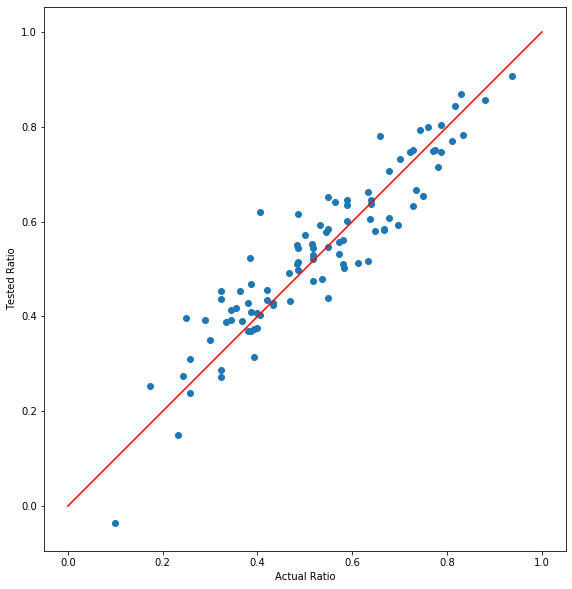

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,10))
plt.scatter(y_pred_val, y_test_data_predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Tested Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [46]:
# 予測結果を逆標準化
# 予測値
y_test_data.predict = test_result * df_train_y.std() + df_train_y.mean()
# 正解
y_pred_val = y_test_data * df_train_y.std() + df_train_y.mean()

In [47]:
rmse = np.sqrt(sum((y_pred_val - y_test_data.predict) ** 2) / len(y_pred_val))
print("RMSE = ", rmse)

RMSE =  0.06631089763450376


CONF_Amer   -0.113299
CONF_MEAC    0.114049
CONF_BSky    0.119084
3P_D         0.121634
ORB          0.126441
TOR         -0.135654
CONF_SEC    -0.160531
CONF_Slnd    0.162356
CONF_B12    -0.163323
DRB         -0.172514
CONF_ACC    -0.174905
3P_O         0.190890
CONF_B10    -0.192367
EFG_O       -0.243801
TORD         0.261490
2P_O         0.262747
2P_D         0.291593
BARTHAG      0.299840
ADJOE        0.381596
EFG_D       -0.755608
Name: Coef, dtype: float64

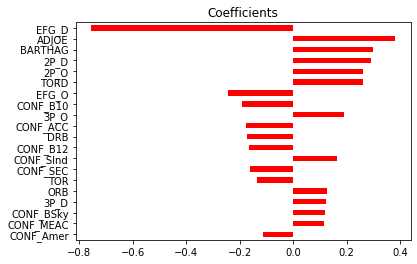

In [48]:
coef_df = pd.DataFrame({"Coef":linreg.coef_, "Coef_abs":np.abs(linreg.coef_)})
coef_df.index = df_train_x.columns
coef_df= coef_df.sort_values(by="Coef_abs")
coef_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_df["Coef"].tail(20)

In [49]:
linreg_all = LinearRegression()

In [50]:
linreg_all.fit(df_train_x_std,df_train_y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_predict_result = linreg_all.predict(df_predict_x_std)

CONF_Amer   -0.096228
3P_O         0.096789
CONF_P12    -0.097866
CONF_BSky    0.103964
CONF_MEAC    0.105597
3P_D         0.122747
2P_O         0.123960
DRB         -0.133214
ORB          0.138305
TOR         -0.150407
CONF_Slnd    0.161248
CONF_B12    -0.162618
CONF_SEC    -0.170315
CONF_B10    -0.191234
CONF_ACC    -0.193839
TORD         0.245369
2P_D         0.262620
ADJOE        0.310385
BARTHAG      0.344662
EFG_D       -0.712234
Name: Coef, dtype: float64

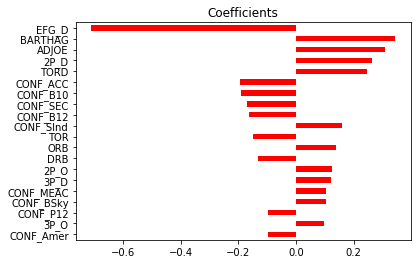

In [52]:
coef_all_df = pd.DataFrame({"Coef":linreg_all.coef_, "Coef_abs":np.abs(linreg_all.coef_)})
coef_all_df.index = df_predict_x.columns
coef_all_df = coef_all_df.sort_values(by="Coef_abs")
coef_all_df["Coef"].tail(20).plot(kind="barh", title="Coefficients", color="red")
coef_all_df["Coef"].tail(20)

In [53]:
# 予測結果を逆標準化
df_predict_y.predict = y_predict_result * df_predict_y.std() + df_predict_y.mean()
y_predict_result_val = df_predict_y

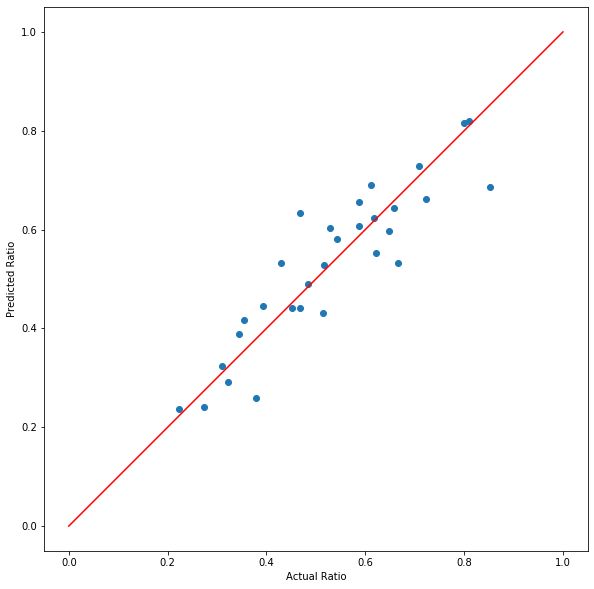

In [54]:
plt.figure(figsize=(10,10))
plt.scatter(y_predict_result_val, df_predict_y.predict)
plt.xlabel("Actual Ratio")
plt.ylabel("Predicted Ratio")
plt.gca().set_aspect("equal", adjustable="box")

x = np.arange(0, 2)
y=x
plt.plot(x,y,color="red")

In [55]:
rmse = np.sqrt(sum((y_predict_result_val - df_predict_y.predict) ** 2) / len(y_predict_result_val))
print("RMSE = ", rmse)

RMSE =  0.07006580964513705
